# REDES SOCIALES, COLABORACIÓN EN RED

**Actividad 1: Ejercicio de Centralidad**  
Grafo Juego de Tronos  
  
**Autores:**  
Martín Salinas Antón - martin.salinas@estudiante.uam.es  
Belén Vivas García - belen.vivas@estudiante.uam.es

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice

## Lectura de Datos

Leemos el grafo con NetworkX y vemos la estructura que tiene.

In [40]:
G = nx.read_graphml('data/juegoDtronos.graphml')

In [41]:
# Vemos una muestra de los nodos que tiene y sus atributos
for node in islice(G.nodes(data=True), 0, 10):
    print(node)

('Addam-Marbrand', {'label': 'Addam-Marbrand', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 548.192, 'y': -1542.1415})
('Brynden-Tully', {'label': 'Brynden-Tully', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': -867.2599, 'y': -1118.1295})
('Cersei-Lannister', {'label': 'Cersei-Lannister', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 725.1648, 'y': -1192.3834})
('Gyles-Rosby', {'label': 'Gyles-Rosby', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 1218.8805, 'y': -862.3968})
('Jaime-Lannister', {'label': 'Jaime-Lannister', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': -144.7509, 'y': -1121.8662})
('Jalabhar-Xho', {'label': 'Jalabhar-Xho', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 1844.3105, 'y': -2152.5952})
('Joffrey-Baratheon', {'label': 'Joffrey-Baratheon', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 339.98248, 'y': -498.40387})
('Kevan-Lannister', {'label': 'Kevan-Lannister', 'size': 10.0, 'r': 0, 'g': 0, 'b': 0, 'x': 119.34762, 'y': -637.41815})
('Lyle-Crakehall', {'label': 'Lyle-Crakehall', 'si

In [42]:
# Vemos una muestra de como son las conexiones entre los nodos
for edge in islice(G.edges(data=True), 0, 10):
    print(edge)

('Addam-Marbrand', 'Brynden-Tully', {'weight': 3.0, 'id': '0'})
('Addam-Marbrand', 'Cersei-Lannister', {'weight': 3.0, 'id': '1'})
('Addam-Marbrand', 'Gyles-Rosby', {'weight': 3.0, 'id': '2'})
('Addam-Marbrand', 'Jaime-Lannister', {'weight': 14.0, 'id': '3'})
('Addam-Marbrand', 'Jalabhar-Xho', {'weight': 3.0, 'id': '4'})
('Addam-Marbrand', 'Joffrey-Baratheon', {'weight': 3.0, 'id': '5'})
('Addam-Marbrand', 'Kevan-Lannister', {'weight': 3.0, 'id': '6'})
('Addam-Marbrand', 'Lyle-Crakehall', {'weight': 4.0, 'id': '7'})
('Addam-Marbrand', 'Oberyn-Martell', {'weight': 3.0, 'id': '8'})
('Addam-Marbrand', 'Tyrion-Lannister', {'weight': 7.0, 'id': '9'})


## Análisis del Grafo

### Conexión

Para determinar la conexión del grafo, primero tenemos que saber si es dirigido o no dirigido.  
Mirando el fichero, podemos ver un atributo al principio: `<graph edgedefault="directed">`, que nos indica que es dirigido, pero usaremos la librería de NetworkX para confirmarlo.

In [43]:
# Vemos si el grafo es dirigido
if nx.is_directed(G):
    print("El grafo es dirigido")
else:
    print("El grafo no es dirigido")

El grafo es dirigido


El grafo es dirigido, por lo que tendremos que buscar componentes fuertemente conectadas (strongly connected components). Primero comprobamos si todo el grafo está fuertemente conectado y, si no lo estuviera, buscaríamos la componente fuertemente conectada más grande.

In [44]:
if nx.is_strongly_connected(G):
    print("El grafo está fuertemente conectado")
else:
    print("El grafo no está fuertemente conectado")

El grafo está fuertemente conectado


El grafo es **conectado**, por lo que trabajaremos directamente con él.

### Caminos más Cortos y Diámetro del Grafo

En primer lugar, obtenemos los caminos más cortos y el diámetro del grafo.

In [45]:
# Esta función devuelve la media de caminos de un grafo dirigido
def media_caminos_dirigido(Graph):
    suma = 0
    N = len(Graph.nodes)
    for u in nx.nodes(Graph):
        for v in nx.nodes(Graph):
            if u != v:
                suma += nx.shortest_path_length(Graph, u, v)
    return suma / (N * (N-1))

def diametro(Graph):
    return nx.diameter(Graph)

In [46]:
# Calculamos la media de caminos más cortos y el diámetro
long_media_grafo = media_caminos_dirigido(G)
print(f"Longitud media de caminos entre 2 nodos del grafo (h): {long_media_grafo}")
print(f"Diámetro del grafo (máximo camino más corto): {diametro(G)}")

Longitud media de caminos entre 2 nodos del grafo (h): 3.416225783003066
Diámetro del grafo (máximo camino más corto): 9


A continuación, graficamos los resultados.

In [47]:
# Esta función grafica la dostribución de caminos más cortos
def distribucion_caminos_dirigido(Graph):
    caminos = []
    for u in nx.nodes(Graph):
        for v in nx.nodes(Graph):
            if u != v:
                caminos.append(nx.shortest_path_length(Graph, u, v))
    plt.hist(caminos)
    plt.xlabel('Longitud del camino más corto')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de caminos más cortos en el grafo dirigido')
    plt.show()

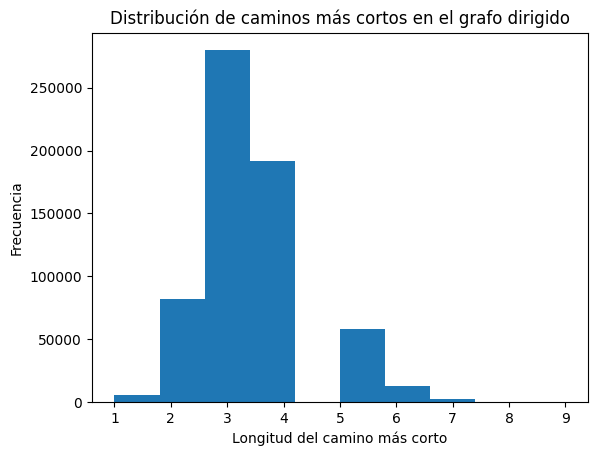

In [48]:
# Obtenemos gráfica
distribucion_caminos_dirigido(G)

### Otras características generales

### Centralidad de cada nodo

Ahora, vamos a calcular para cada nodo:
- Centralidad de Grado
- Centralidad de Vector Propio
- Centralidad de Intermediación
- Centralidad de Cercanía
- Centralidad de Kantz
- Centralidad de PageRank

In [53]:
def calcular_centralidades(Graph):
    centralidad_de_grado = nx.degree_centrality(Graph)
    centralidad_de_vector_propio = nx.eigenvector_centrality(Graph)
    centralidad_de_intermediacion = nx.betweenness_centrality(Graph)
    centralidad_de_cercania = nx.closeness_centrality(Graph)
    centralidad_de_katz = nx.katz_centrality_numpy(Graph)
    centralidad_de_pagerank = nx.pagerank(Graph)

    # Imprimir resultados
    print("Centralidad de grado:")
    for nodo in Graph.nodes:
        print(f"{nodo}: {centralidad_de_grado[nodo]}")
    
    print("\nCentralidad de vector propio:")
    for nodo in Graph.nodes:
        print(f"{nodo}: {centralidad_de_vector_propio[nodo]}")
    
    print("\nCentralidad de intermediación:")
    for nodo in Graph.nodes:
        print(f"{nodo}: {centralidad_de_intermediacion[nodo]}")
    
    print("\nCentralidad de cercanía:")
    for nodo in Graph.nodes:
        print(f"{nodo}: {centralidad_de_cercania[nodo]}")
    
    print("\nCentralidad de Katz:")
    for nodo in Graph.nodes:
        print(f"{nodo}: {centralidad_de_katz[nodo]}")
    
    print("\nCentralidad de PageRank:")
    for nodo in Graph.nodes:
        print(f"{nodo}: {centralidad_de_pagerank[nodo]}")

In [54]:
calcular_centralidades(G)

Centralidad de grado:
Addam-Marbrand: 0.03018867924528302
Brynden-Tully: 0.047798742138364776
Cersei-Lannister: 0.2440251572327044
Gyles-Rosby: 0.045283018867924525
Jaime-Lannister: 0.2540880503144654
Jalabhar-Xho: 0.012578616352201257
Joffrey-Baratheon: 0.17358490566037735
Kevan-Lannister: 0.042767295597484274
Lyle-Crakehall: 0.012578616352201257
Oberyn-Martell: 0.05031446540880503
Tyrion-Lannister: 0.3069182389937107
Tywin-Lannister: 0.12075471698113208
Varys: 0.08553459119496855
Catelyn-Stark: 0.18867924528301885
Robb-Stark: 0.1861635220125786
Walder-Frey: 0.047798742138364776
Arya-Stark: 0.2113207547169811
Theon-Greyjoy: 0.1660377358490566
Rickard-Karstark: 0.03018867924528302
Edmure-Tully: 0.06037735849056604
Lysa-Arryn: 0.06037735849056604
Daven-Lannister: 0.007547169811320755
Edwyn-Frey: 0.010062893081761006
Emmon-Frey: 0.02012578616352201
Hoster-Tully: 0.025157232704402514
Nestor-Royce: 0.01761006289308176
Ryman-Frey: 0.03018867924528302
Daenerys-Targaryen: 0.18364779874213835
